In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Training Data

In [2]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//'

theWhole = {}
# theWhole is dictionary containing views (keys) which the values are DICOM files

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [3]:
viewConvert = {'LCA_Caudal': 0, 
               'LCA_Cranial': 1,
               'LCA_Cranial_LAO': 2,
               'LCA_Cranial_RAO': 3,
               'LCA_Spider': 4,
               'RCA_Cranial': 5,
               'RCA_LAO': 6}

In [4]:
theWhole['LCA_Cranial_LAO']

['I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\0AFD257E3761428881D7A2FFAC11F8D3.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_

In [5]:
array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

### 2D to 1D

In [6]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

In [7]:
x_sample_list = []
y_sample_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_sample_list.append(x_item)
        y_sample_list.append(y)

In [8]:
len(x_sample_list)

954

In [9]:
len(x_sample_list[0])

262144

In [10]:
len(y_sample_list)

954

In [11]:
y_sample_list

['LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caud

In [12]:
y_sample_digital_list = []
for item in y_sample_list:
    y_sample_digital_list.append(viewConvert[item])

In [13]:
X_train = np.array(x_sample_list)
y_train = np.array(y_sample_digital_list)

## Validation Data

In [14]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'I://Chuan//Documents//MyData//NormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//test//'

theWhole = {}

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [15]:
array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

### 2D to 1D

In [16]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

In [18]:
x_test_list = []
y_test_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

In [19]:
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(viewConvert[item])

X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

## Neural Network

### Model

In [20]:
model = Sequential()
model.add(Dense(800, activation='relu', kernel_initializer='he_normal', input_shape=(262144, )))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(7, activation='softmax'))

#### Tensorboard Initilization

In [21]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the model

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training

In [23]:
model.fit(X_train, y_train, epochs=500, batch_size=200, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
1/5 [=====>........................] - ETA: 0s - loss: 306.8052 - accuracy: 0.1250WARNING:tensorflow:From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5/5 [==============================] - 18s 4s/step - loss: 24764.4219 - accuracy: 0.1268 - val_loss: 48802.9609 - val_accuracy: 0.1429
Epoch 2/500
5/5 [==============================] - 17s 3s/step - loss: 31712.5684 - accuracy: 0.1363 - val_loss: 19529.4941 - val_accuracy: 0.1429
Epoch 3/500
5/5 [==============================] - 17s 3s/step - loss: 17371.0879 - accuracy: 0.1352 - val_loss: 12064.0166 - val_accuracy: 0.1429
Epoch 4/500
5/5 [==============================] - 17s 3s/step - loss: 17123.7910 - accuracy: 0.1646 - val_loss: 14301.9434 - val_accuracy: 0.1429
Epoch 5/500
5/5 [==============================] - 17s 3s/st

5/5 [==============================] - 17s 3s/step - loss: 125.3789 - accuracy: 0.7002 - val_loss: 90.2574 - val_accuracy: 0.8000
Epoch 56/500
5/5 [==============================] - 17s 3s/step - loss: 140.1050 - accuracy: 0.6751 - val_loss: 309.4544 - val_accuracy: 0.5143
Epoch 57/500
5/5 [==============================] - 17s 3s/step - loss: 193.0320 - accuracy: 0.6268 - val_loss: 237.3492 - val_accuracy: 0.4000
Epoch 58/500
5/5 [==============================] - 17s 3s/step - loss: 374.7867 - accuracy: 0.4853 - val_loss: 196.5365 - val_accuracy: 0.6286
Epoch 59/500
5/5 [==============================] - 17s 3s/step - loss: 227.0616 - accuracy: 0.5996 - val_loss: 289.3140 - val_accuracy: 0.4857
Epoch 60/500
5/5 [==============================] - 17s 3s/step - loss: 229.4537 - accuracy: 0.6184 - val_loss: 158.2767 - val_accuracy: 0.5857
Epoch 61/500
5/5 [==============================] - 17s 3s/step - loss: 141.8168 - accuracy: 0.6572 - val_loss: 224.3117 - val_accuracy: 0.6143
Epoch 

5/5 [==============================] - 17s 3s/step - loss: 138.0791 - accuracy: 0.6929 - val_loss: 254.4566 - val_accuracy: 0.6429
Epoch 113/500
5/5 [==============================] - 17s 3s/step - loss: 184.4968 - accuracy: 0.6279 - val_loss: 88.0366 - val_accuracy: 0.7714
Epoch 114/500
5/5 [==============================] - 17s 3s/step - loss: 103.6323 - accuracy: 0.7432 - val_loss: 104.9876 - val_accuracy: 0.6857
Epoch 115/500
5/5 [==============================] - 17s 3s/step - loss: 92.3568 - accuracy: 0.7526 - val_loss: 124.3592 - val_accuracy: 0.7000
Epoch 116/500
5/5 [==============================] - 17s 3s/step - loss: 102.9869 - accuracy: 0.7453 - val_loss: 124.4797 - val_accuracy: 0.8000
Epoch 117/500
5/5 [==============================] - 17s 3s/step - loss: 91.9826 - accuracy: 0.7579 - val_loss: 208.6175 - val_accuracy: 0.6429
Epoch 118/500
5/5 [==============================] - 17s 3s/step - loss: 129.8812 - accuracy: 0.6897 - val_loss: 118.9205 - val_accuracy: 0.7714
Ep

Epoch 169/500
5/5 [==============================] - 17s 3s/step - loss: 36.5636 - accuracy: 0.8574 - val_loss: 88.0572 - val_accuracy: 0.8000
Epoch 170/500
5/5 [==============================] - 17s 3s/step - loss: 39.9545 - accuracy: 0.8574 - val_loss: 74.9711 - val_accuracy: 0.8143
Epoch 171/500
5/5 [==============================] - 17s 3s/step - loss: 34.5105 - accuracy: 0.8522 - val_loss: 78.8332 - val_accuracy: 0.7714
Epoch 172/500
5/5 [==============================] - 17s 3s/step - loss: 30.6865 - accuracy: 0.8732 - val_loss: 56.0413 - val_accuracy: 0.8286
Epoch 173/500
5/5 [==============================] - 18s 4s/step - loss: 39.4764 - accuracy: 0.8491 - val_loss: 91.6777 - val_accuracy: 0.6857
Epoch 174/500
5/5 [==============================] - 17s 3s/step - loss: 41.0268 - accuracy: 0.8491 - val_loss: 70.7089 - val_accuracy: 0.7000
Epoch 175/500
5/5 [==============================] - 18s 4s/step - loss: 42.9476 - accuracy: 0.8407 - val_loss: 67.5041 - val_accuracy: 0.7857

5/5 [==============================] - 17s 3s/step - loss: 20.4960 - accuracy: 0.8931 - val_loss: 52.7406 - val_accuracy: 0.8143
Epoch 227/500
5/5 [==============================] - 17s 3s/step - loss: 23.5345 - accuracy: 0.8679 - val_loss: 62.6512 - val_accuracy: 0.7857
Epoch 228/500
5/5 [==============================] - 17s 3s/step - loss: 26.6079 - accuracy: 0.8679 - val_loss: 71.0026 - val_accuracy: 0.7571
Epoch 229/500
5/5 [==============================] - 17s 3s/step - loss: 37.3939 - accuracy: 0.8260 - val_loss: 110.1208 - val_accuracy: 0.6857
Epoch 230/500
5/5 [==============================] - 17s 3s/step - loss: 30.1882 - accuracy: 0.8470 - val_loss: 67.7765 - val_accuracy: 0.8286
Epoch 231/500
5/5 [==============================] - 17s 3s/step - loss: 18.7611 - accuracy: 0.8931 - val_loss: 52.8991 - val_accuracy: 0.8000
Epoch 232/500
5/5 [==============================] - 17s 3s/step - loss: 20.8797 - accuracy: 0.8732 - val_loss: 58.5868 - val_accuracy: 0.8000
Epoch 233/50

5/5 [==============================] - 17s 3s/step - loss: 94.8246 - accuracy: 0.6939 - val_loss: 129.9314 - val_accuracy: 0.6429
Epoch 284/500
5/5 [==============================] - 17s 3s/step - loss: 109.3455 - accuracy: 0.6803 - val_loss: 166.2606 - val_accuracy: 0.6714
Epoch 285/500
5/5 [==============================] - 17s 3s/step - loss: 65.3359 - accuracy: 0.7788 - val_loss: 93.7472 - val_accuracy: 0.7429
Epoch 286/500
5/5 [==============================] - 17s 3s/step - loss: 61.3719 - accuracy: 0.8050 - val_loss: 63.2514 - val_accuracy: 0.7714
Epoch 287/500
5/5 [==============================] - 17s 3s/step - loss: 40.0465 - accuracy: 0.8281 - val_loss: 50.1140 - val_accuracy: 0.7571
Epoch 288/500
5/5 [==============================] - 17s 3s/step - loss: 25.5000 - accuracy: 0.8805 - val_loss: 51.6215 - val_accuracy: 0.8571
Epoch 289/500
5/5 [==============================] - 17s 3s/step - loss: 37.2760 - accuracy: 0.8532 - val_loss: 57.6254 - val_accuracy: 0.7714
Epoch 290/

5/5 [==============================] - 17s 3s/step - loss: 11.3360 - accuracy: 0.9151 - val_loss: 60.9172 - val_accuracy: 0.7429
Epoch 341/500
5/5 [==============================] - 17s 3s/step - loss: 15.0736 - accuracy: 0.8721 - val_loss: 62.0847 - val_accuracy: 0.7429
Epoch 342/500
5/5 [==============================] - 17s 3s/step - loss: 21.4539 - accuracy: 0.8732 - val_loss: 47.2173 - val_accuracy: 0.7857
Epoch 343/500
5/5 [==============================] - 17s 3s/step - loss: 19.9873 - accuracy: 0.8658 - val_loss: 37.5529 - val_accuracy: 0.8286
Epoch 344/500
5/5 [==============================] - 17s 3s/step - loss: 9.3859 - accuracy: 0.9256 - val_loss: 51.8332 - val_accuracy: 0.7571
Epoch 345/500
5/5 [==============================] - 17s 3s/step - loss: 10.3300 - accuracy: 0.9140 - val_loss: 52.9028 - val_accuracy: 0.7429
Epoch 346/500
5/5 [==============================] - 17s 3s/step - loss: 9.4480 - accuracy: 0.9203 - val_loss: 48.9427 - val_accuracy: 0.7429
Epoch 347/500
5

5/5 [==============================] - 17s 3s/step - loss: 9.9326 - accuracy: 0.9371 - val_loss: 33.6961 - val_accuracy: 0.8429
Epoch 398/500
5/5 [==============================] - 17s 3s/step - loss: 12.2475 - accuracy: 0.8973 - val_loss: 33.0405 - val_accuracy: 0.8429
Epoch 399/500
5/5 [==============================] - 17s 3s/step - loss: 12.6418 - accuracy: 0.8899 - val_loss: 44.1682 - val_accuracy: 0.8143
Epoch 400/500
5/5 [==============================] - 17s 3s/step - loss: 7.0686 - accuracy: 0.9361 - val_loss: 82.5494 - val_accuracy: 0.7286
Epoch 401/500
5/5 [==============================] - 17s 3s/step - loss: 12.7831 - accuracy: 0.8941 - val_loss: 54.6595 - val_accuracy: 0.8000
Epoch 402/500
5/5 [==============================] - 17s 3s/step - loss: 13.9502 - accuracy: 0.8805 - val_loss: 54.7507 - val_accuracy: 0.6857
Epoch 403/500
5/5 [==============================] - 17s 3s/step - loss: 8.9801 - accuracy: 0.9109 - val_loss: 33.7088 - val_accuracy: 0.8714
Epoch 404/500
5/

5/5 [==============================] - 17s 3s/step - loss: 5.2831 - accuracy: 0.9403 - val_loss: 46.1446 - val_accuracy: 0.7429
Epoch 455/500
5/5 [==============================] - 17s 3s/step - loss: 7.6799 - accuracy: 0.9182 - val_loss: 48.6088 - val_accuracy: 0.7286
Epoch 456/500
5/5 [==============================] - 17s 3s/step - loss: 6.1066 - accuracy: 0.9298 - val_loss: 37.5180 - val_accuracy: 0.7571
Epoch 457/500
5/5 [==============================] - 17s 3s/step - loss: 5.0502 - accuracy: 0.9423 - val_loss: 30.2597 - val_accuracy: 0.8286
Epoch 458/500
5/5 [==============================] - 17s 3s/step - loss: 4.3144 - accuracy: 0.9413 - val_loss: 28.2054 - val_accuracy: 0.8429
Epoch 459/500
5/5 [==============================] - 17s 3s/step - loss: 5.7580 - accuracy: 0.9371 - val_loss: 25.4482 - val_accuracy: 0.8714
Epoch 460/500
5/5 [==============================] - 17s 3s/step - loss: 3.6845 - accuracy: 0.9539 - val_loss: 44.0936 - val_accuracy: 0.8000
Epoch 461/500
5/5 [=

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               209716000 
_________________________________________________________________
dense_1 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 217       
Total params: 209,907,027
Trainable params: 209,907,027
Non-trainable params: 0
__________________________________________

In [25]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19412), started 1 day, 2:10:11 ago. (Use '!kill 19412' to kill it.)

### Save the entire model

In [26]:
model.save('coroLearning_NeralNetwork_canoical') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: coroLearning_NeralNetwork_canoical\assets


### Load the saved model

In [22]:
new_model = keras.models.load_model('coroLearning_NeralNetwork_canoical')

In [23]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               209716000 
_________________________________________________________________
dense_1 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 217       
Total params: 209,907,027
Trainable params: 209,907,027
Non-trainable params: 0
__________________________________________

## Performance Measures

In [27]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.714


In [28]:
y_predict = model.predict(X_test)

In [29]:
y_predict

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0

In [30]:
len(y_predict)

70

In [40]:
y_predict_filtered = []
for sample in y_predict:
    for i in range(7):
        if sample[i] > 0.2:
            y_predict_filtered.append(i)        

In [41]:
y_predict_filtered

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 6,
 1,
 1,
 1,
 1,
 0,
 6,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 0,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 5,
 4,
 4,
 4,
 0,
 2,
 4,
 4,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [42]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6])

In [43]:
len(y_test)

70

### Confusion Matrix (混淆矩阵)

In [44]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6]))
confusion = pd.DataFrame(cm, index=[0, 1, 2, 3, 4, 5, 6],
                        columns=[0, 1, 2, 3, 4, 5, 6])
confusion.to_csv('ConfusionMatrix_NN.csv')
confusion

,0,1,2,3,4,5,6
0,10,0,0,0,0,0,0
1,1,6,0,1,0,0,2
2,0,7,2,1,0,0,0
3,4,0,0,6,0,0,0
4,1,0,2,0,6,1,0
5,0,0,0,0,0,10,0
6,0,0,0,0,0,0,10


In [45]:
print(classification_report(y_test, y_predict_filtered))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.46      0.60      0.52        10
           2       0.50      0.20      0.29        10
           3       0.75      0.60      0.67        10
           4       1.00      0.60      0.75        10
           5       0.91      1.00      0.95        10
           6       0.83      1.00      0.91        10

   micro avg       0.71      0.71      0.71        70
   macro avg       0.73      0.71      0.69        70
weighted avg       0.73      0.71      0.69        70



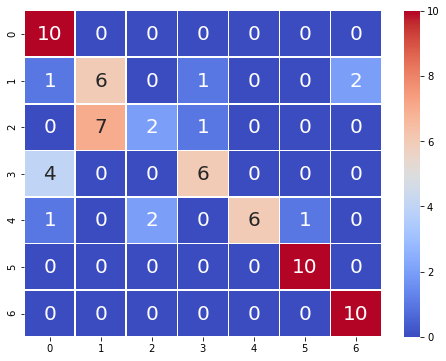

In [46]:
plt.figure(figsize=(8, 6))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

In [39]:
heat_map.figure.savefig("Heatmap_NN.png", dpi=400)